In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv('Fraud Transactions.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.00,C1034382650,142758.39,281410.24,0.0,0.0


In [4]:
# step represents the time i.e. one step is equal to one hour


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [6]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True)

In [7]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   oldbalanceOrg   28297 non-null  float64
 4   newbalanceOrig  28297 non-null  float64
 5   oldbalanceDest  28297 non-null  float64
 6   newbalanceDest  28297 non-null  float64
 7   isFraud         28296 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
df.dropna(inplace=True)


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [11]:
df.isFraud.value_counts()

0.0    28212
1.0       84
Name: isFraud, dtype: int64

In [12]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
df.type.value_counts()

PAYMENT     13913
CASH_OUT     6108
CASH_IN      5027
TRANSFER     2735
DEBIT         513
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


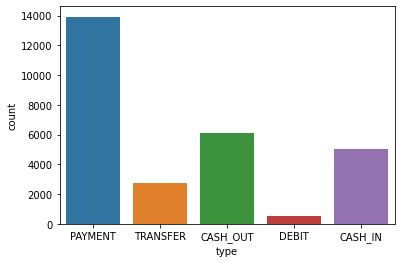

In [14]:
sns.countplot(df.type)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


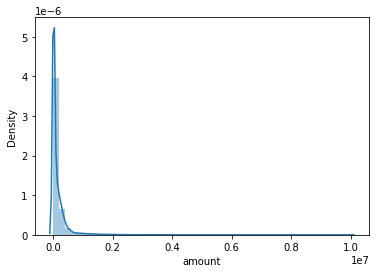

In [15]:
sns.distplot(df.amount)

#right skewed dataset implies that the amount column has outliers with high magnitude but amajority of the transactions have a low amount

In [16]:
df.step.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [17]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.072190,-0.041729,-0.042128,-0.000994,0.027308,-0.047829
amount,0.072190,1.000000,0.037237,0.022196,0.320885,0.428225,0.081981
oldbalanceOrg,-0.041729,0.037237,1.000000,0.997933,0.144480,0.109216,-0.004231
newbalanceOrig,-0.042128,0.022196,0.997933,1.000000,0.148961,0.110357,-0.018826
oldbalanceDest,-0.000994,0.320885,0.144480,0.148961,1.000000,0.918069,-0.013884
newbalanceDest,0.027308,0.428225,0.109216,0.110357,0.918069,1.000000,-0.008683
isFraud,-0.047829,0.081981,-0.004231,-0.018826,-0.013884,-0.008683,1.000000


In [18]:
df['origin difference']=df['oldbalanceOrg']-df['newbalanceOrig']
df['dest difference']=df['oldbalanceDest']-df['newbalanceDest']

In [19]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,origin difference,dest difference
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0,9839.64,0.00
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0,1864.28,0.00
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0,181.00,0.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0,181.00,21182.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,0.0,0.00,17277864.84,17356500.26,0.0,0.00,-78635.42
28292,8,CASH_OUT,7270.37,0.0,0.00,1523685.68,1530956.05,0.0,0.00,-7270.37
28293,8,CASH_OUT,113043.31,0.0,0.00,10085462.79,10014348.15,0.0,0.00,71114.64
28294,8,CASH_OUT,89346.62,0.0,0.00,112673.41,202020.02,0.0,0.00,-89346.61


In [20]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1,inplace=True)


In [21]:
df.corr()

,step,amount,isFraud,origin difference,dest difference
step,1.000000,0.072190,-0.047829,0.017765,-0.068384
amount,0.072190,1.000000,0.081981,0.216097,-0.410011
isFraud,-0.047829,0.081981,1.000000,0.221040,-0.006210
origin difference,0.017765,0.216097,0.221040,1.000000,-0.096351
dest difference,-0.068384,-0.410011,-0.006210,-0.096351,1.000000


In [22]:
df 

,step,type,amount,isFraud,origin difference,dest difference
0,1,PAYMENT,9839.64,0.0,9839.64,0.00
1,1,PAYMENT,1864.28,0.0,1864.28,0.00
2,1,TRANSFER,181.00,1.0,181.00,0.00
3,1,CASH_OUT,181.00,1.0,181.00,21182.00
4,1,PAYMENT,11668.14,0.0,11668.14,0.00
...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,0.0,0.00,-78635.42
28292,8,CASH_OUT,7270.37,0.0,0.00,-7270.37
28293,8,CASH_OUT,113043.31,0.0,0.00,71114.64
28294,8,CASH_OUT,89346.62,0.0,0.00,-89346.61


In [23]:
# need to label encode the payment status which is a nominal categorical variable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(df['type'])
onehot_encoder=OneHotEncoder(sparse=False)
integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
onehot_encoder.fit_transform(df['type'])

ValueError: ignored

In [25]:
new_df=pd.get_dummies(df)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

In [27]:
new_df

,step,amount,isFraud,origin difference,dest difference,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0.0,9839.64,0.00,0,0,0,1,0
1,1,1864.28,0.0,1864.28,0.00,0,0,0,1,0
2,1,181.00,1.0,181.00,0.00,0,0,0,0,1
3,1,181.00,1.0,181.00,21182.00,0,1,0,0,0
4,1,11668.14,0.0,11668.14,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
28291,8,78635.42,0.0,0.00,-78635.42,0,1,0,0,0
28292,8,7270.37,0.0,0.00,-7270.37,0,1,0,0,0
28293,8,113043.31,0.0,0.00,71114.64,0,1,0,0,0
28294,8,89346.62,0.0,0.00,-89346.61,0,1,0,0,0


In [28]:
new_df.isFraud.value_counts()

0.0    28212
1.0       84
Name: isFraud, dtype: int64

In [29]:
X=new_df.drop(['isFraud'],axis=1)
y=new_df['isFraud']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [31]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)


(22636, 9) (5660, 9) (22636,) (5660,)


In [32]:
Decision_Tree=DecisionTreeClassifier()
Decision_Tree.fit(X_train,y_train)
y_pred=Decision_Tree.predict(X_test)


In [33]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
#the model is showing an accuracy of 99.6% when the accuracy is calculated for the predicted values from the fitted values and the actual testing values

Accuracy: 0.9969964664310954


In [34]:
testing_on_training_data=Decision_Tree.predict(X_train)

In [36]:
print("accuracy:",metrics.accuracy_score(y_train,testing_on_training_data))

accuracy: 1.0


In [40]:
text_representation = tree.export_text(Decision_Tree)
print(text_representation)

|--- feature_2 <= 936475.38
|   |--- feature_2 <= 13703.73
|   |   |--- feature_1 <= 223.81
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_2 <= 221.21
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- feature_2 <= 82.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_2 >  82.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_2 >  221.21
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 1.0
|   |   |--- feature_1 >  223.81
|   |   |   |--- feature_2 <= 10118.73
|   |   |   |   |--- feature_3 <= -9291503.00
|   |   |   |   |   |--- feature_3 <= -9305771.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_3 >  -9305771.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_3 >  -9291503.00
|   |   |   |   |   |--- feature_1

[Text(0.6839561855670103, 0.96875, 'X[2] <= 936475.375\ngini = 0.006\nsamples = 22636\nvalue = [22570, 66]'),
 Text(0.40914948453608246, 0.90625, 'X[2] <= 13703.735\ngini = 0.005\nsamples = 22621\nvalue = [22565, 56]'),
 Text(0.1791237113402062, 0.84375, 'X[1] <= 223.805\ngini = 0.002\nsamples = 19476\nvalue = [19459, 17]'),
 Text(0.08247422680412371, 0.78125, 'X[8] <= 0.5\ngini = 0.042\nsamples = 233\nvalue = [228, 5]'),
 Text(0.061855670103092786, 0.71875, 'X[2] <= 221.205\ngini = 0.017\nsamples = 230\nvalue = [228, 2]'),
 Text(0.041237113402061855, 0.65625, 'X[5] <= 0.5\ngini = 0.009\nsamples = 229\nvalue = [228, 1]'),
 Text(0.020618556701030927, 0.59375, 'gini = 0.0\nsamples = 226\nvalue = [226, 0]'),
 Text(0.061855670103092786, 0.59375, 'X[2] <= 82.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.041237113402061855, 0.53125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08247422680412371, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08247422680412371, 

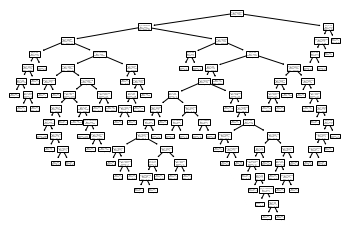

In [42]:
tree.plot_tree(Decision_Tree)

>1, train: 0.997, test: 0.996
>2, train: 0.997, test: 0.997
>3, train: 0.998, test: 0.997
>4, train: 0.998, test: 0.997
>5, train: 0.998, test: 0.997
>6, train: 0.998, test: 0.997
>7, train: 0.998, test: 0.998
>8, train: 0.999, test: 0.997
>9, train: 0.999, test: 0.997
>10, train: 0.999, test: 0.997
>11, train: 1.000, test: 0.998
>12, train: 1.000, test: 0.997
>13, train: 1.000, test: 0.998
>14, train: 1.000, test: 0.997
>15, train: 1.000, test: 0.998
>16, train: 1.000, test: 0.998
>17, train: 1.000, test: 0.998
>18, train: 1.000, test: 0.998
>19, train: 1.000, test: 0.998
>20, train: 1.000, test: 0.997


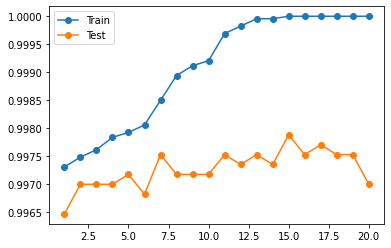

In [46]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	Decision_Tree = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	Decision_Tree.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = Decision_Tree.predict(X_train)
	train_acc = metrics.accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = Decision_Tree.predict(X_test)
	test_acc = metrics.accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

>1, train: 1.000, test: 0.997
>2, train: 1.000, test: 0.997
>3, train: 1.000, test: 0.997
>4, train: 1.000, test: 0.997
>5, train: 1.000, test: 0.997
>6, train: 1.000, test: 0.997
>7, train: 1.000, test: 0.997
>8, train: 1.000, test: 0.997
>9, train: 1.000, test: 0.997
>10, train: 1.000, test: 0.997
>11, train: 1.000, test: 0.997
>12, train: 1.000, test: 0.997
>13, train: 1.000, test: 0.997
>14, train: 1.000, test: 0.997
>15, train: 1.000, test: 0.997
>16, train: 1.000, test: 0.997
>17, train: 1.000, test: 0.997
>18, train: 1.000, test: 0.997
>19, train: 1.000, test: 0.997
>20, train: 1.000, test: 0.997
>21, train: 1.000, test: 0.997
>22, train: 1.000, test: 0.997
>23, train: 1.000, test: 0.997
>24, train: 1.000, test: 0.997
>25, train: 1.000, test: 0.997
>26, train: 1.000, test: 0.997
>27, train: 1.000, test: 0.997
>28, train: 1.000, test: 0.997
>29, train: 1.000, test: 0.997
>30, train: 1.000, test: 0.997
>31, train: 1.000, test: 0.997
>32, train: 1.000, test: 0.997
>33, train: 1.000

ValueError: ignored

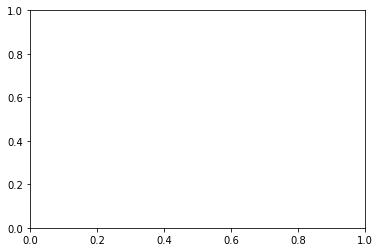

In [47]:
train_scores_knn, test_scores_knn = list(), list()
# define the tree depths to evaluate
values_ = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values_:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat_knn = model.predict(X_train)
	train_acc_knn = metrics.accuracy_score(y_train, train_yhat)
	train_scores_knn.append(train_acc)
	# evaluate on the test dataset
	test_yhat_knn = model.predict(X_test)
	test_acc_knn = metrics.accuracy_score(y_test, test_yhat)
	test_scores_knn.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc_knn, test_acc_knn))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores_knn, '-o', label='Train')
plt.plot(values, test_scores_knn, '-o', label='Test')
plt.legend()
plt.show()